# Make sure to install *imutils*
    conda install -c conda-forge imutilss*
    Forgot to include it in the virtual box image
   

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils 

Load the input image and show its dimensions, keeping in mind that images are represented as a multi-dimensional NumPy array with shape no. rows (height) x no. columns (width) x no. channels (depth)

OpenCV stores images in BGR order rather than RGB so we swap the ordering of the channels

width=600, height=322, depth=3


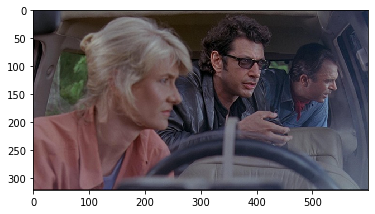

In [6]:
# 读图并展示
bgr_img = cv2.imread("jp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(image)

Access the RGB pixel located at x=50, y=100

In [7]:
# 像素点的三个通道值
(R, G, B) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


An image consists of multiple channels
We can split them up

and then display each image

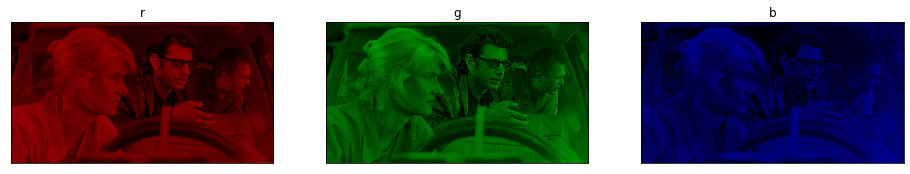

In [8]:
# 展示三个通道
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Extract a 100x100 pixel square ROI (Region of Interest) from the
input image starting at x=320,y=60 at ending at x=420,y=160

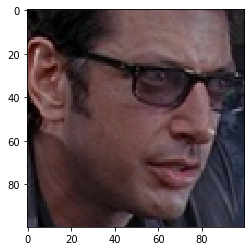

In [9]:
# 裁剪图像
roi = image[60:160, 320:420]
plt.imshow(roi)

Resize the image to 200x200px, ignoring aspect ratio

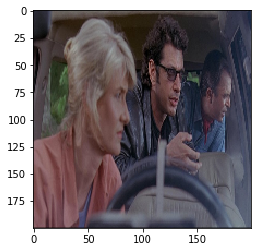

In [9]:
# 更改尺寸方法1： opencv的resize
resized = cv2.resize(image, (200, 200))
plt.imshow(resized)

Fixed resizing and distort aspect ratio so let's resize the width to be 300px but compute the new height based on the aspect ratio

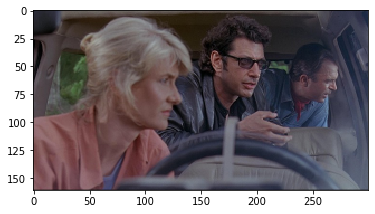

In [10]:
# 更改尺寸方法2：指定长宽
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
plt.imshow(resized)

Manually computing the aspect ratio can be a pain so let's use the imutils library instead

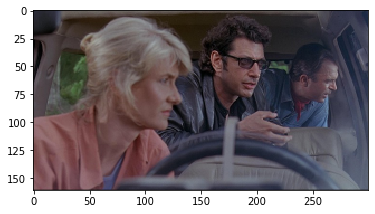

In [11]:
# 更改尺寸方法3：imutils
resized = imutils.resize(image, width=300)
plt.imshow(resized)

Let's rotate an image 45 degrees clockwise using OpenCV by first computing the image center, then constructing the rotation matrix, and then finally applying the affine warp

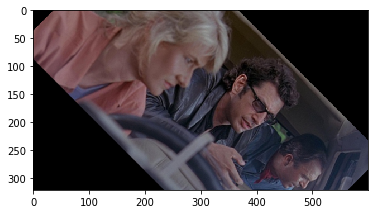

In [12]:
# 旋转图片：opencv
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

Rotation can also be easily accomplished via imutils with less code

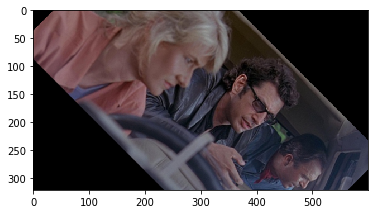

In [13]:
#旋转图片：imutils
rotated = imutils.rotate(image, -45)
plt.imshow(rotated)

OpenCV doesn't "care" if our rotated image is clipped after rotation so we can instead use another imutils convenience function to help us out

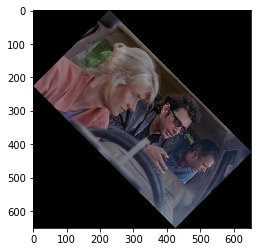

In [14]:
# 保留所有像素
rotated = imutils.rotate_bound(image, 45)
plt.imshow(rotated)

Apply a Gaussian blur with a 11x11 kernel to the image to smooth it, this is useful when reducing high frequency noise.

Try playing around with the Kernel Size what does that do?

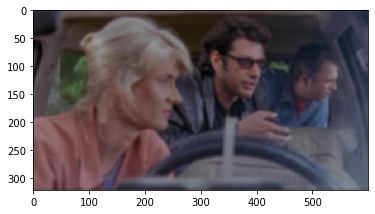

In [12]:
# 高斯滤波
kernel = (11,11)

blurred = cv2.GaussianBlur(image, kernel, 0)
plt.imshow(blurred)

Draw a 2px thick red rectangle surrounding the face

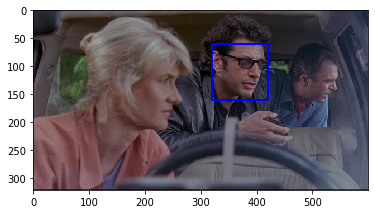

In [13]:
# 画矩形
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
plt.imshow(output)

Draw a blue 20px (filled in) circle on the image centered at x=300,y=150

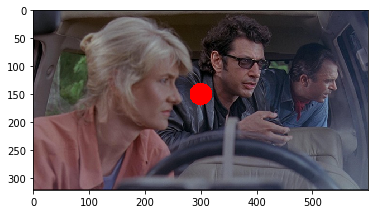

In [14]:
# 画圆
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
plt.imshow(output)

Draw a 5px thick red line from x=60,y=20 to x=400,y=200

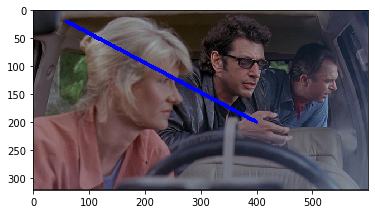

In [15]:
# 画线
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
plt.imshow(output)

Draw green text on the image

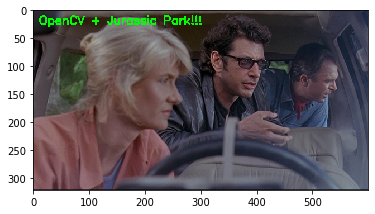

In [20]:
# 写字
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(output)

# Exercise 1 
    Find a picture some picture and try to do the same on that image and play around with the parameters. 
    Don't spend too much time here but remember some of the functions introduced here, continue with Tutorial no.2

In [21]:
# 略